In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [13]:
data_dir = "/homes/ukumaras/Projects/fast"
down_dir = "~/Downloads"

twitter_base = pd.read_csv(f"{data_dir}/results_remote_new/CkQST_KNN_NO_twitter_maxk3_ckqst.csv")
place_base = pd.read_csv(f"{data_dir}/results_remote_new/CkQST_KNN_NO_places_ckqst.csv")
spatialuni_base = pd.read_csv(f"{data_dir}/results_remote_new/CkQST_KNN_NO_spatialuni_ckqst.csv")
spatialskew_base = pd.read_csv(f"{data_dir}/results_remote_new/CkQST_KNN_NO_spatialskew_ckqst.csv")
textuni_base = pd.read_csv(f"{data_dir}/results_remote_new/CkQST_KNN_NO_textuni_ckqst.csv")

twitter_adopt = pd.read_csv(f"{down_dir}/results_remote_new/AdoptCkQST_KNN_NO_tweets_adopt_ckqst.csv")
place_adopt = pd.read_csv(f"{data_dir}/results_remote_new/CkQST_KNN_NO_places_ckqst.csv")
spatialuni_adopt = pd.read_csv(f"{down_dir}/results_remote_new/AdoptCkQST_KNN_NO_spatialuni_adopt_ckqst.csv")
spatialskew_adopt = pd.read_csv(f"{down_dir}/results_remote_new/AdoptCkQST_KNN_NO_spatialskew_adopt_ckqst.csv")
textuni_adopt = pd.read_csv(f"{down_dir}/results_remote_new/AdoptCkQST_KNN_NO_textuni_adopt_ckqst.csv")

twitter_fast = pd.read_csv(f"{data_dir}/results_remote_new/FAST_KNN_NO_ObjIndex_twitter_maxk3_fast.csv")
place_fast = pd.read_csv(f"{data_dir}/results_remote_new/FAST_KNN_NO_ObjIndex_places_fast.csv")
spatialuni_fast = pd.read_csv(f"{data_dir}/results_remote_new/FAST_KNN_NO_ObjIndex_spatialuni_fast.csv")
spatialskew_fast = pd.read_csv(f"{data_dir}/results_remote_new/FAST_KNN_NO_ObjIndex_spatialskew_fast.csv")
textuni_fast = pd.read_csv(f"{data_dir}/results_remote_new/FAST_KNN_NO_ObjIndex_textuni_fast.csv")

df = pd.concat([twitter_base, place_base, spatialuni_base, spatialskew_base, textuni_base, twitter_adopt, place_adopt, spatialuni_adopt, spatialskew_adopt, textuni_adopt, twitter_fast, place_fast, spatialuni_fast, spatialskew_fast, textuni_fast])
df = pd.DataFrame(df[df.num_queries == 5000000]).groupby('name').mean().reset_index()
df['name'] = df['name'].apply(lambda x: x.replace('adopt_ckqst', 'ac'))
df['index'] = df['name'].apply(lambda x: x.split("_")[0])

ds_map = {
    'maxk3': 'Tweets',
    'tweets': "Tweets",
    'spatialuni': 'SpatialUni',
    'spatialskew': 'SpatialSkewL',
    'textuni': 'TextUni',
    'places': 'Places',
}
df['dataset'] = df['name'].apply(lambda x: x.split("_")[-2] if x.split("_")[-2] not in ds_map else ds_map[x.split("_")[-2]])
df

,name,creation_time,search_time,create_mem,search_mem,num_queries,num_objects,k,create_object_mem,create_query_mem,...,search_query_mem,search_query_idx_mem,search_query_struct_mem,search_query_keymap_mem,search_object_idx_mem,clean_time,knn_deg_ratio,knn_ar_thresh,index,dataset
0,AdoptCkQST_KNN_NO_spatialskew_ac,4.813949e+12,6.844090e+11,NaN,NaN,5000000.0,100000.0,5.0,52721704.0,2.553179e+09,...,2.553179e+09,2.987749e+09,2.987749e+09,81224856.0,250432884.0,NaN,NaN,NaN,AdoptCkQST,SpatialSkewL
1,AdoptCkQST_KNN_NO_spatialuni_ac,4.413315e+12,6.282045e+11,NaN,NaN,5000000.0,100000.0,5.0,52722352.0,2.553184e+09,...,2.553184e+09,2.986102e+09,2.986102e+09,81236688.0,238553392.0,NaN,NaN,NaN,AdoptCkQST,SpatialUni
2,AdoptCkQST_KNN_NO_textuni_ac,3.165705e+10,7.351819e+08,NaN,NaN,5000000.0,100000.0,5.0,40016328.0,2.164216e+09,...,2.164216e+09,2.475736e+09,2.475736e+09,130451776.0,152665360.0,NaN,NaN,NaN,AdoptCkQST,TextUni
3,AdoptCkQST_KNN_NO_tweets_ac,6.350165e+12,8.708976e+11,NaN,NaN,5000000.0,100000.0,5.0,52720936.0,2.553186e+09,...,2.553186e+09,2.989923e+09,2.989923e+09,81228072.0,276623448.0,NaN,NaN,NaN,AdoptCkQST,Tweets
4,CkQST_KNN_NO_places_ckqst,4.399930e+12,9.298972e+10,0.0,0.0,5000000.0,100000.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CkQST,Places
5,CkQST_KNN_NO_spatialskew_ckqst,1.052868e+13,3.037715e+10,0.0,0.0,5000000.0,100000.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CkQST,SpatialSkewL
6,CkQST_KNN_NO_spatialuni_ckqst,9.745106e+12,2.639524e+10,0.0,0.0,5000000.0,100000.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CkQST,SpatialUni
7,CkQST_KNN_NO_textuni_ckqst,1.108282e+11,6.215088e+08,0.0,0.0,5000000.0,100000.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CkQST,TextUni
8,CkQST_KNN_NO_twitter_maxk3_ckqst,5.772058e+12,5.104670e+09,0.0,0.0,5000000.0,100000.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CkQST,Tweets
9,FAST_KNN_NO_ObjIndex_places_fast,4.432664e+12,4.234665e+10,0.0,0.0,5000000.0,100000.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,5.0,FAST,Places


### Create

In [14]:
create = pd.DataFrame(df.loc[:, ['index', 'dataset', 'creation_time']])
create

,index,dataset,creation_time
0,AdoptCkQST,SpatialSkewL,4.813949e+12
1,AdoptCkQST,SpatialUni,4.413315e+12
2,AdoptCkQST,TextUni,3.165705e+10
3,AdoptCkQST,Tweets,6.350165e+12
4,CkQST,Places,4.399930e+12
5,CkQST,SpatialSkewL,1.052868e+13
6,CkQST,SpatialUni,9.745106e+12
7,CkQST,TextUni,1.108282e+11
8,CkQST,Tweets,5.772058e+12
9,FAST,Places,4.432664e+12


In [15]:
out = create.pivot(index='dataset', columns='index', values='creation_time').reset_index()
out.to_csv('out.dat', header=False, index=False, sep='\t')

### Search

In [18]:
search = pd.DataFrame(df.loc[:, ['index', 'dataset', 'search_time']])
search

,index,dataset,search_time
0,AdoptCkQST,SpatialSkewL,6.844090e+11
1,AdoptCkQST,SpatialUni,6.282045e+11
2,AdoptCkQST,TextUni,7.351819e+08
3,AdoptCkQST,Tweets,8.708976e+11
4,CkQST,Places,9.298972e+10
5,CkQST,SpatialSkewL,3.037715e+10
6,CkQST,SpatialUni,2.639524e+10
7,CkQST,TextUni,6.215088e+08
8,CkQST,Tweets,5.104670e+09
9,FAST,Places,4.234665e+10


In [17]:
out = search.pivot(index='dataset', columns='index', values='search_time').reset_index()
out.to_csv('out.dat', header=False, index=False, sep='\t')

<Axes: xlabel='dataset', ylabel='search_time'>

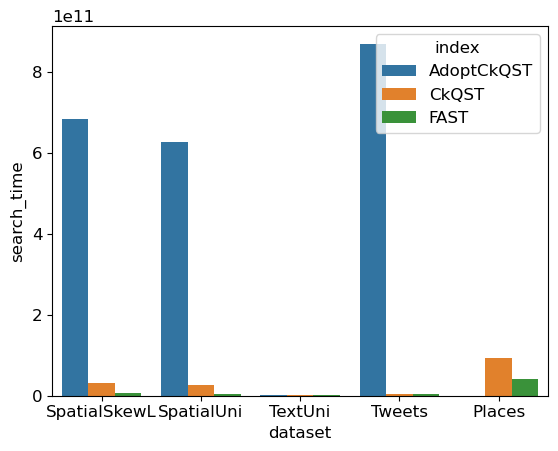

In [19]:
sns.barplot(x='dataset', y='search_time', hue='index', data=search)